In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mglearn

w[0]: 0.393906  b: -0.031804


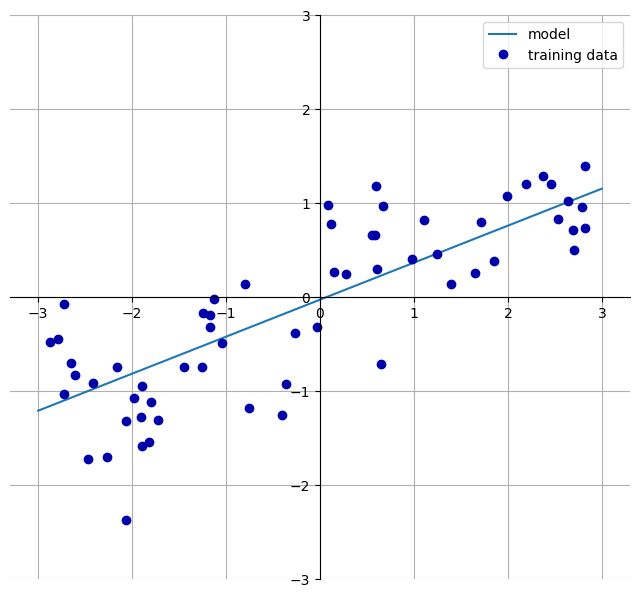

In [26]:
mglearn.plots.plot_linear_regression_wave()

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

In [28]:
print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))

lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746


In [29]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.67
Test set score: 0.66


In [30]:
from sklearn.datasets import fetch_california_housing
X, y = fetch_california_housing(return_X_y=True)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

In [32]:
print("Train set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Train set score: 0.61
Test set score: 0.59


Normally, in the book, boston housing dataset is used and the train and test set scores are, respectively, 0.95 and 0.61. So, that is
 basically a sign of overfitting, the book says.

In [33]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score : {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.61
Test set score : 0.59


As the book says, in its case of this topic, the ridge regression results in a better test set scorre than the train set score, respectively, 0,75 and 0.89. With linear regression, we were overfitting our data. Ridge is a more restricted model, so we are less likely to overfit. A less complex model means worse performance on the training set, but better generalization. As we are only interested in generalization performance, we should choose the Ridge model over the LinearRegression model.

In [34]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)

print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

Training set score: 0.61
Test set score: 0.59


In [35]:
ridge25 = Ridge(alpha=25).fit(X_train, y_train)

print("Training set score: {:.2f}".format(ridge25.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge25.score(X_test, y_test)))

Training set score: 0.61
Test set score: 0.59


In [36]:
ridge50= Ridge(alpha=50).fit(X_train, y_train)

print("Training set score: {:.2f}".format(ridge50.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge50.score(X_test, y_test)))

Training set score: 0.61
Test set score: 0.59


In [37]:
ridge01= Ridge(alpha=0.1).fit(X_train, y_train)

print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))

Training set score: 0.61
Test set score: 0.59


In the book for alpha=10 training=0.79 and test=0.64
for alpha=0.1 training=0.93 and test=0.77

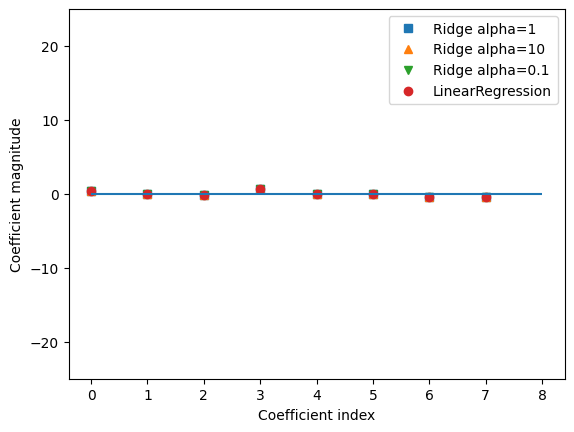

In [38]:
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")
plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()

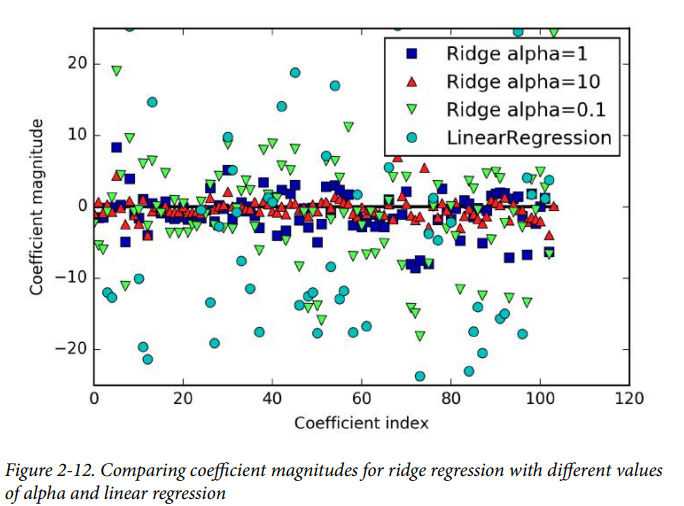

For the values and the results in the book, the figure above is valid

In [39]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

Training set score: 0.29
Test set score: 0.28
Number of features used: 3


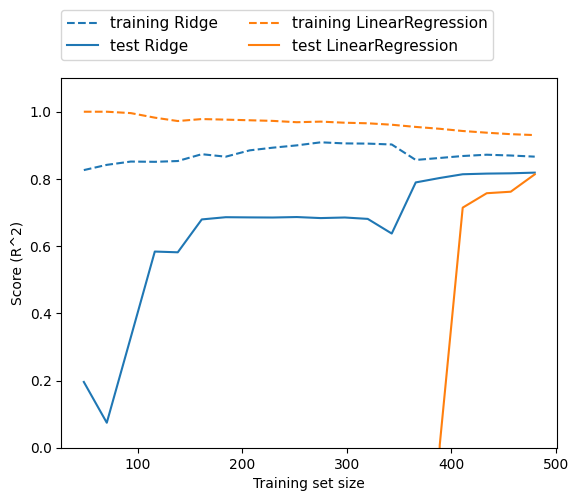

In [43]:
mglearn.plots.plot_ridge_n_samples()

In [40]:
# we increase the default setting of "max_iter"
# otherwise the model would warn us that it did not converge
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)

In [41]:
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso001.coef_ != 0)))

Training set score: 0.61
Test set score: 0.59
Number of features used: 8


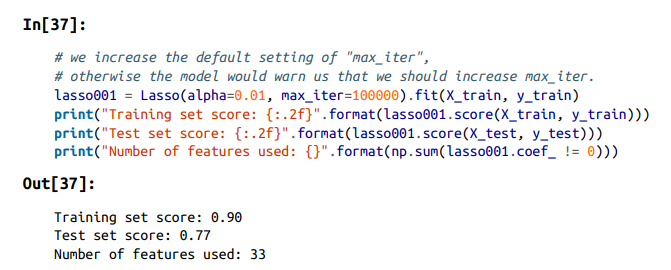

In [42]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso00001.coef_ != 0)))


Training set score: 0.61
Test set score: 0.59
Number of features used: 8


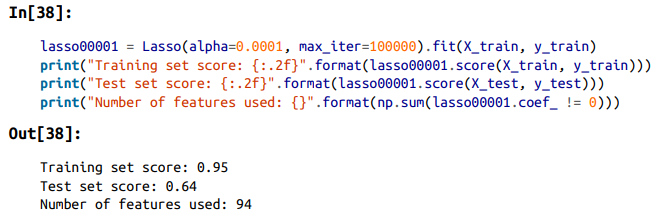

Text(0, 0.5, 'Coefficient magnitude')

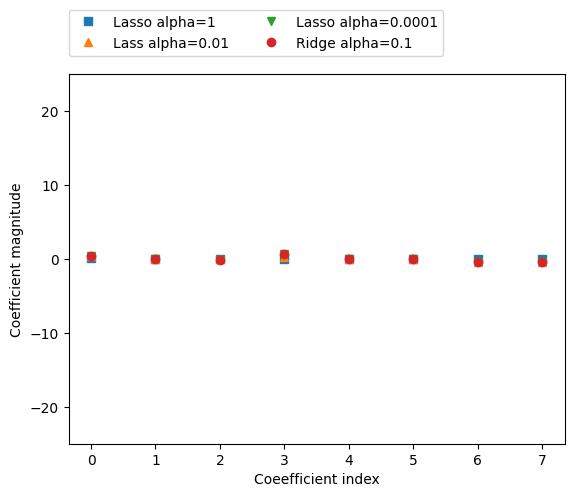

In [54]:
plt.plot(lasso.coef_, "s", label="Lasso alpha=1")
plt.plot(lasso001.coef_, "^", label="Lass alpha=0.01")
plt.plot(lasso00001.coef_, "v", label="Lasso alpha=0.0001")

plt.plot(ridge01.coef_, "o", label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Coeefficient index")
plt.ylabel("Coefficient magnitude")

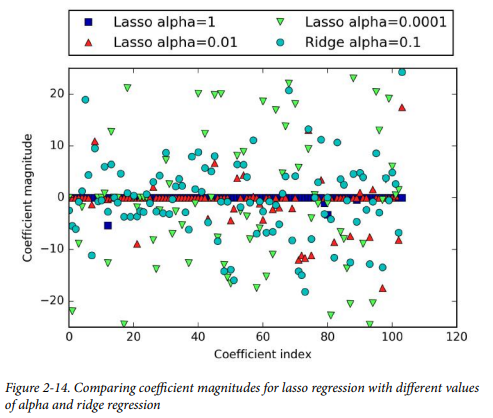